# Pandas Exploration
In this notebook I will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Import the raw data
In this section, I will import the raw data into a `pandas` DataFrame.

### data: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [4]:
df = pd.read_csv('MVCC.csv')

/Users/xxy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data inspection
In this section, I will show a few basic statistics of this dataset, including:  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

### Random 5 rows from the data set:

In [5]:
df.sample(n=5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1264221,06/23/2015,20:10,BROOKLYN,11230.0,40.616036,-73.955787,"(40.616036, -73.9557865)",AVENUE N,EAST 19 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3246474,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
78729,07/07/2021,13:45,BROOKLYN,11223.0,40.605940,-73.979290,"(40.60594, -73.97929)",WEST 6 STREET,QUENTIN ROAD,NaN,...,Unspecified,Unspecified,NaN,NaN,4434961,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
973783,10/27/2016,10:45,NaN,NaN,40.726570,-73.852650,"(40.72657, -73.85265)",QUEENS BOULEVARD,NaN,NaN,...,Unspecified,Unspecified,Unspecified,NaN,3548179,Sedan,Sedan,Sedan,Pick-up Truck,NaN
584328,06/13/2018,10:00,QUEENS,11385.0,40.711834,-73.907990,"(40.711834, -73.90799)",TONSOR STREET,HIMROD STREET,NaN,...,NaN,NaN,NaN,NaN,3920755,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
66858,11/17/2020,22:32,MANHATTAN,10029.0,40.797943,-73.940030,"(40.797943, -73.94003)",3 AVENUE,EAST 116 STREET,NaN,...,NaN,NaN,NaN,NaN,4369005,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


### Each of the column names and their data types

In [6]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

### Unique features of all categorical variables

In [7]:
for i, col_type in enumerate(df.dtypes):
    if col_type == "object":
        print("\nVariable {} takes the values: {}".format(df.columns[i],
                                                          df[df.columns[i]].unique()))


Variable CRASH DATE takes the values: ['04/14/2021' '04/13/2021' '04/15/2021' ... '07/10/2012' '07/29/2012'
 '07/04/2012']

Variable CRASH TIME takes the values: ['5:32' '21:35' '16:15' ... '4:42' '4:01' '6:01']

Variable BOROUGH takes the values: [nan 'BROOKLYN' 'QUEENS' 'STATEN ISLAND' 'BRONX' 'MANHATTAN']

Variable ZIP CODE takes the values: [nan 11217.0 11222.0 11106.0 11226.0 10304.0 11201.0 10461.0 11234.0
 10312.0 11429.0 10474.0 11207.0 10475.0 11236.0 10025.0 10012.0 11377.0
 11221.0 11211.0 11220.0 10451.0 11213.0 10460.0 11206.0 11368.0 11366.0
 11203.0 11102.0 10457.0 10308.0 11210.0 11237.0 11379.0 10032.0 10453.0
 11218.0 11385.0 10036.0 10016.0 11228.0 10065.0 11224.0 10306.0 11230.0
 10472.0 11235.0 11233.0 10027.0 10468.0 10473.0 10459.0 10017.0 10001.0
 10022.0 11223.0 11238.0 10002.0 11432.0 10467.0 10029.0 11205.0 10452.0
 11420.0 10024.0 11373.0 11209.0 11204.0 10026.0 10456.0 10469.0 10014.0
 10454.0 11422.0 11436.0 10023.0 11369.0 10466.0 11691.0 11101.0 11367.0


Variable CONTRIBUTING FACTOR VEHICLE 5 takes the values: [nan 'Unspecified' 'Reaction to Uninvolved Vehicle'
 'Following Too Closely' 'Driver Inattention/Distraction'
 'Other Vehicular' 'Passing Too Closely' 'Outside Car Distraction'
 'Driver Inexperience' 'Pavement Slippery' 'Obstruction/Debris'
 'Unsafe Speed' 'Failure to Yield Right-of-Way' 'Alcohol Involvement'
 'Pavement Defective' 'Aggressive Driving/Road Rage'
 'Tire Failure/Inadequate' 'Drugs (illegal)'
 'Passing or Lane Usage Improper' 'Fell Asleep' 'Fatigued/Drowsy'
 'Other Electronic Device' 'Traffic Control Disregarded' 'Illness'
 'Brakes Defective' 'Glare' 'Failure to Keep Right' 'Steering Failure'
 'Backing Unsafely' 'Traffic Control Device Improper/Non-Working']

Variable VEHICLE TYPE CODE 1 takes the values: ['Sedan' 'Station Wagon/Sport Utility Vehicle' 'Taxi' ...
 'LARGE COM VEH(6 OR MORE TIRES)' 'scoo' 'PEDICAB']

Variable VEHICLE TYPE CODE 2 takes the values: ['Sedan' nan 'Box Truck' ... 'LARGE COM VEH(6 OR MORE TI

## Data munging
This section includes necessary code to inspect and munge the original data.

### Inspect the number of null value in each column as well as the overall shape

In [8]:
print(df.isnull().sum())
print(df.shape)

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           583007
ZIP CODE                          583233
LATITUDE                          218473
LONGITUDE                         218473
LOCATION                          218473
ON STREET NAME                    387684
CROSS STREET NAME                 684390
OFF STREET NAME                  1587778
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5576
CONTRIBUTING FACTOR VEHICLE 2     277063
CONTRIBUTING FACTOR VEHICLE 3    1752731
CONTRIBUTING FACTOR VEHICLE 4    1854359
CONTRIBUTING FACTOR VEHICLE 5    1875432
COLLISION_ID                           0
VEHICLE TYPE COD

### Perform row-wise removal of null value in columns ['BOROUGH', 'LOCATION', 'ON STREET NAME', 'ZIP CODE'] and reset index. Inspect null value, shape and 5 random sample from the cleaned data.

In [9]:
df_clean = df.dropna(subset=['BOROUGH', 'LOCATION', 'ON STREET NAME', 'ZIP CODE'])
df_clean = df_clean.reset_index(drop=True)
print(df_clean.isnull().sum())
print(df_clean.shape)
print(df_clean.sample(5))

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                               0
LATITUDE                               0
LONGITUDE                              0
LOCATION                               0
ON STREET NAME                         0
CROSS STREET NAME                    502
OFF STREET NAME                  1008665
NUMBER OF PERSONS INJURED              5
NUMBER OF PERSONS KILLED               9
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       3116
CONTRIBUTING FACTOR VEHICLE 2     139545
CONTRIBUTING FACTOR VEHICLE 3     949962
CONTRIBUTING FACTOR VEHICLE 4     995702
CONTRIBUTING FACTOR VEHICLE 5    1005141
COLLISION_ID                           0
VEHICLE TYPE COD

## Data analysis
This section includes code and documentation of analysis within this section.

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Inspecting the statistics of number of persons injured in collisions

In [11]:
df_clean['NUMBER OF PERSONS INJURED'].describe()

count   1008694.00000
mean          0.29481
std           0.68012
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          43.00000
Name: NUMBER OF PERSONS INJURED, dtype: float64

### Inspecting the statistics of number of persons killed in collisions

In [12]:
df_clean['NUMBER OF PERSONS KILLED'].describe()

count   1008690.00000
mean          0.00140
std           0.03958
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           8.00000
Name: NUMBER OF PERSONS KILLED, dtype: float64

### Inspecting the statictics of number of persons injured and killed around Union Square.

In [13]:
df_clean[df_clean['ZIP CODE'] == 10003][['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
count,3520.00000,3520.00000
mean,0.26136,0.00114
std,0.54037,0.03370
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,0.00000,0.00000
max,7.00000,1.00000


### Inspecting the number of pedestrains killed on location with latitude lower than 40.8.

In [14]:
df_clean[df_clean['LATITUDE'] < 40.8]['NUMBER OF PEDESTRIANS KILLED'].describe()

count   829431.00000
mean         0.00081
std          0.02939
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          6.00000
Name: NUMBER OF PEDESTRIANS KILLED, dtype: float64

### Inspecting number of persons injured and killed in each borough and sort them in descending order.

In [15]:
df_clean[['BOROUGH',
          'NUMBER OF PERSONS INJURED', 
          'NUMBER OF PERSONS KILLED']].groupby(['BOROUGH']).mean().sort_values(by=['NUMBER OF PERSONS INJURED', 
                                                                                   'NUMBER OF PERSONS KILLED'],
                                                                               ascending=False)

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
BOROUGH,,
BROOKLYN,0.34116,0.00152
BRONX,0.33628,0.00138
QUEENS,0.30700,0.00149
STATEN ISLAND,0.28963,0.00169
MANHATTAN,0.19649,0.00110


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

In [16]:
plt.style.use('seaborn')

### Plots of average number of persons injured and killed in different boroughs

Text(0.5, 1.0, 'Average Number of Persons Killed in Different Boroughs')

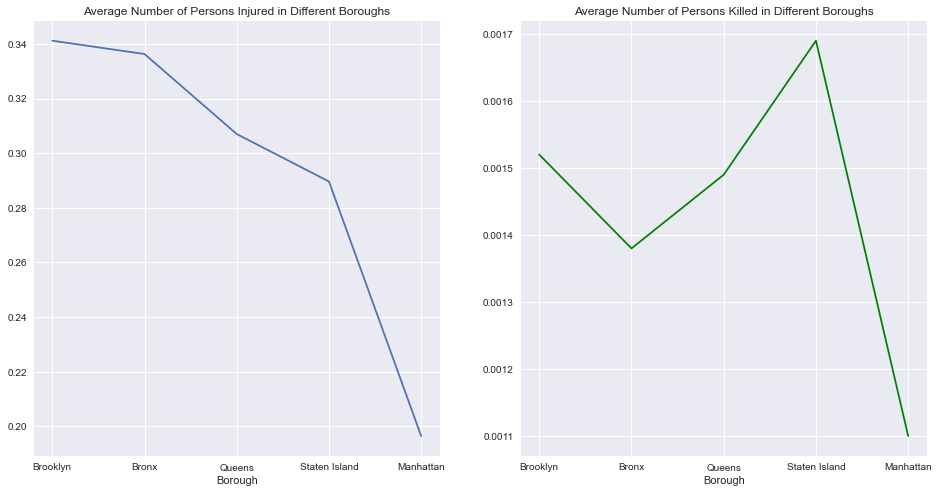

In [17]:
npi = [0.34116, 0.33628, 0.30700, 0.28963, 0.19649]
npk = [0.00152, 0.00138, 0.00149, 0.00169, 0.00110]
labels = ['Brooklyn','Bronx','Queens','Staten Island','Manhattan']
fig, axes = plt.subplots(1,2, figsize = (16,8))
axes[0].plot(labels, npi)
axes[0].set_xlabel('Borough')
axes[0].set_title('Average Number of Persons Injured in Different Boroughs')
axes[1].plot(labels, npk, color = 'green')
axes[1].set_xlabel('Borough')
axes[1].set_title('Average Number of Persons Killed in Different Boroughs')


### The bar chart for contributing factor vehicle 1

/var/folders/bh/w0c981hj7xz27hvx2k2cfffh0000gn/T/ipykernel_95598/293515543.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


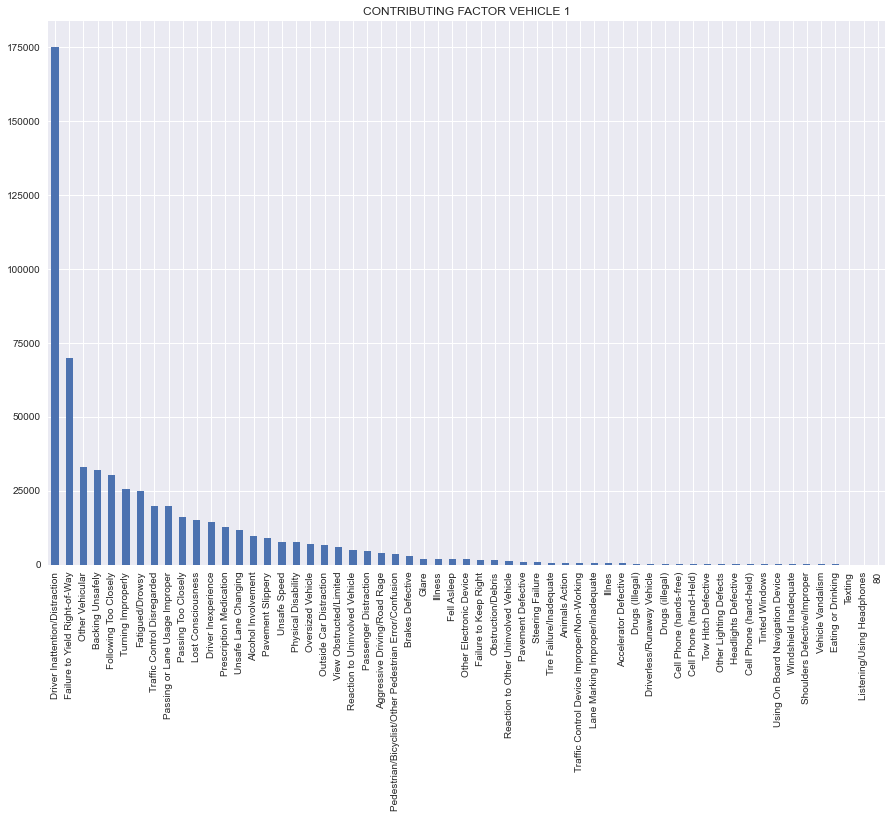

In [18]:
df_cfv = df_clean[df_clean['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']
df_cfv['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().plot(kind = "bar",figsize = (15,10)).set_title('CONTRIBUTING FACTOR VEHICLE 1')  
fig.show()

### The plot of different numbers of persons injured and killed

Text(0.5, 1.0, 'Persons Killed in Collisions Stats')

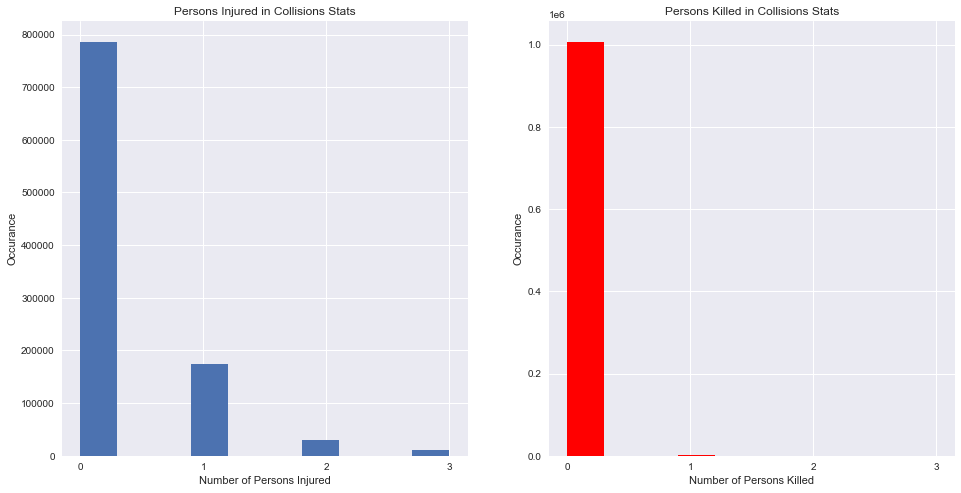

In [19]:
fig, axes = plt.subplots(1,2, figsize = (16,8))
axes[0].hist(df_clean['NUMBER OF PERSONS INJURED'], range = (0,3))
axes[0].set_xticks([0,1,2,3])
axes[0].set_xlabel('Number of Persons Injured')
axes[0].set_ylabel('Occurance')
axes[0].set_title('Persons Injured in Collisions Stats')
axes[1].hist(df_clean['NUMBER OF PERSONS KILLED'], color = 'r',range = (0,3))
axes[1].set_xticks([0,1,2,3])
axes[1].set_xlabel('Number of Persons Killed')
axes[1].set_ylabel('Occurance')
axes[1].set_title('Persons Killed in Collisions Stats')

### The scatter plot of collisions in Manhattan

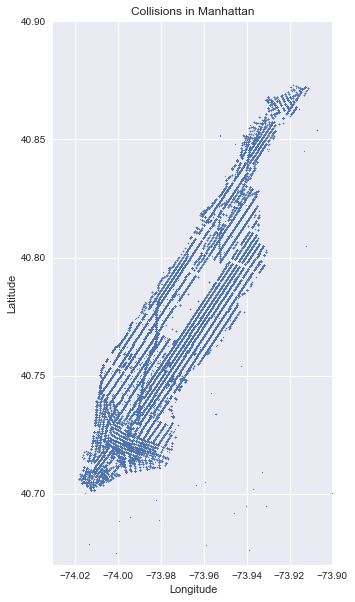

In [20]:
df_analysis = df_clean[df_clean['BOROUGH'] == 'MANHATTAN'][['LATITUDE', 'LONGITUDE']]
df_analysis = df_analysis[df_analysis['LATITUDE'] != 0]
plt.figure(figsize=(5,10))
plt.scatter(df_analysis['LONGITUDE'],df_analysis['LATITUDE'], s=0.8)
plt.title('Collisions in Manhattan')
plt.xlabel('Longitude')
plt.xlim([-74.03, -73.90])
plt.ylabel('Latitude')
plt.ylim([40.67, 40.9])
plt.show()

### Boxplot for collisions latitude and longitude for different numbers of persons killed

[Text(1, 0, '0'), Text(2, 0, '1'), Text(3, 0, '2'), Text(4, 0, '3')]

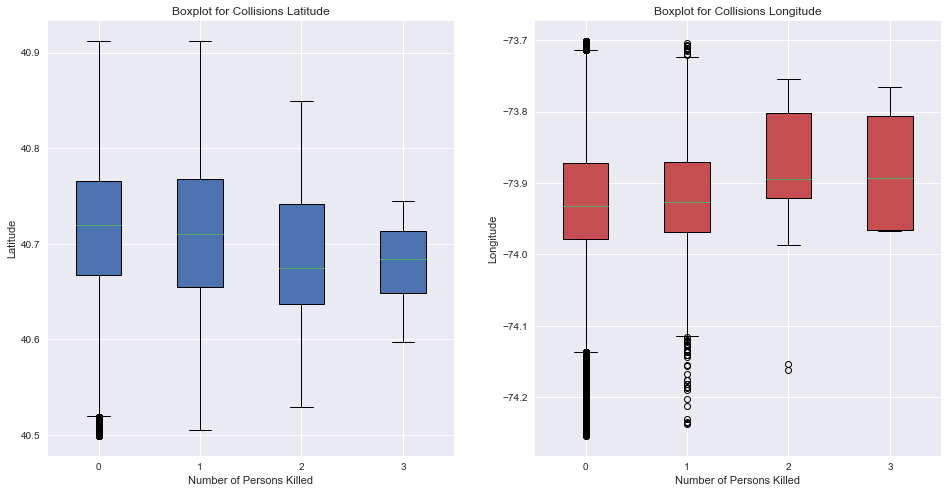

In [21]:
df_bo = df_clean[['LATITUDE', 
                  'LONGITUDE', 
                  'NUMBER OF PERSONS INJURED', 
                  'NUMBER OF PERSONS KILLED']]
df_bo = df_bo[df_bo['LATITUDE'] != 0]

listla = []
listlo = []

listla.append(df_bo[df_bo['NUMBER OF PERSONS KILLED'] == 0]['LATITUDE'])
listla.append(df_bo[df_bo['NUMBER OF PERSONS KILLED'] == 1]['LATITUDE'])
listla.append(df_bo[df_bo['NUMBER OF PERSONS KILLED'] == 2]['LATITUDE'])
listla.append(df_bo[df_bo['NUMBER OF PERSONS KILLED'] == 3]['LATITUDE'])

listlo.append(df_bo[df_bo['NUMBER OF PERSONS KILLED'] == 0]['LONGITUDE'])
listlo.append(df_bo[df_bo['NUMBER OF PERSONS KILLED'] == 1]['LONGITUDE'])
listlo.append(df_bo[df_bo['NUMBER OF PERSONS KILLED'] == 2]['LONGITUDE'])
listlo.append(df_bo[df_bo['NUMBER OF PERSONS KILLED'] == 3]['LONGITUDE'])

fig, axes = plt.subplots(1,2, figsize = (16,8))

axes[0].boxplot(listla, patch_artist = True, boxprops = dict(facecolor = "C0"))
axes[0].set_title('Boxplot for Collisions Latitude')
axes[0].set_xlabel('Number of Persons Killed')
axes[0].set_ylabel('Latitude')
axes[0].set_xticklabels(['0','1','2','3'])

axes[1].boxplot(listlo, patch_artist = True, boxprops = dict(facecolor = "C2"))
axes[1].set_title('Boxplot for Collisions Longitude')
axes[1].set_xlabel('Number of Persons Killed')
axes[1].set_ylabel('Longitude')
axes[1].set_xticklabels(['0','1','2','3'])